# Robustness Analysis
##  delprobamat model
### Imports

In [1]:
%matplotlib inline
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from IPython.display import display
import matplotlib
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
sns.set_palette('colorblind')
sns.set_style("ticks")
sns.set_context("paper")
linewidthin = 3.68153
textwidthin = 7.50146

p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))

### no in threshold 1

In [8]:
df = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd_not_in_cooperation_threshold.pkl')
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df['unit'] = df['seed'] + 0.1*df['network_seed']
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
network_seed             0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
unit                     0
dtype: int64


Paranoia    0.0  0.23358425289  0.341760094529  All
Projection                                         
0.0          50             50              50  150
0.25         50             50              50  150
0.5          50             50              50  150
0.75         50             50              50  150
All         200            200             200  600

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     0      1.000000  0.000000  Beta(10, 2), Paranoia 0.23  0.233584   
1     1      0.999990  0.000010  Beta(10, 2), Paranoia 0.23  0.233584   
2   101      0.996649  0.003351  Beta(10, 2), Paranoia 0.23  0.233584   
3   201      0.993173  0.006827  Beta(10, 2), Paranoia 0.23  0.233584   
4   301      0.989349  0.010651  Beta(10, 2), Paranoia 0.23  0.233584   

     Prior  Projection  Time  gigant component size  network_seed  seed  \
0  (10, 2)        0.75  1999                      0             4    10   
1  (10, 2)        0.75  1999                      3             4    10   
2  (10, 2)        0.75  1999                     22             4    10   
3  (10, 2)        0.75  1999                     54             4    10   
4  (10, 2)        0.75  1999                    100             4    10   

   size of active nodes        f      SGC       SA   isna  unit  
0                     0  0.00000  0.00000  0.00000  False  10.4  
1                     3  0.00001  0.00003  0.00003  False  10.4  
2                   771  0.00101  0.00022  0.00771  False  10.4  
3                  1558  0.00201  0.00054  0.01558  False  10.4  
4                  2411  0.00301  0.00100  0.02411  False  10.4

0
0.0


In [9]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

(0, 1.1)

(0, 1.1)

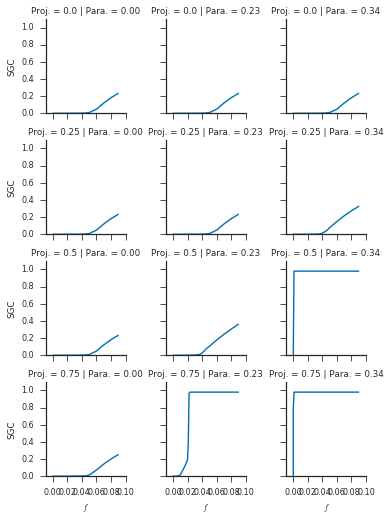

In [10]:
space=.2
g = sns.FacetGrid(df.query('f<0.1'), col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SGC')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

[ 0.23358425  0.34176009  0.        ]


/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


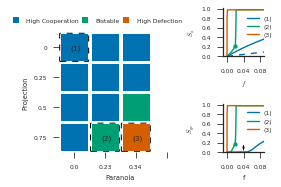

In [11]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(df.Paranoia.unique())
subdf = df.query('(Paranoia==0 & Projection==0) or (Projection==0.75 & Paranoia> 0.23 & Paranoia < 0.3) | (Projection==0.75 & Paranoia>0.3)')
subdf['condition'] = 100 * subdf['Projection'] + np.round(subdf['Paranoia'], 2)
subdf = subdf.sort_values('condition')

# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='condition', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf, time='f', unit='unit', value='SGC', condition='condition',
           color=current_palette, ax=ax,legend=True)
ax.annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[20, 'f'], sgc_mean.loc[20, 75.23], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(0.95, 0.38), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='condition', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='unit', value='SA', condition='condition', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[20, 'f'], sa_mean.loc[20, 75.23], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], loc='upper right', bbox_to_anchor=(.95, 0.89), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.04, 0.08])
ax.plot([0, 0.09], [0, 0.09], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in df.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    #print(projection, paranoia, pepe.query('f<0.01')[['f', 'SA']])
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
    if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
        pv.loc[projection, paranoia] = 'High Defection'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,:4])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=27)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.23, 0.34])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(1.38, 0.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(2.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_robust1.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

### no in thresold 2

In [2]:
df1 = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd_not_in_cooperation_threshold2.pkl')
df2 = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd_not_in_cooperation_threshold22.pkl')
df = pd.concat([df1, df2])
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df['unit'] = df['seed'] + 0.1 * df['network_seed']
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
network_seed             0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
unit                     0
dtype: int64


Paranoia    0.0  0.249407244819  All
Projection                          
0.0          50              50  100
0.25         50              50  100
0.5          50              50  100
0.75         50              50  100
1.0          50              50  100
1.25         50              50  100
All         300             300  600

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     0      1.000000  0.000000  Beta(11, 1), Paranoia 0.25  0.249407   
1     1      0.998550  0.001450  Beta(11, 1), Paranoia 0.25  0.249407   
2   101      0.000355  0.999645  Beta(11, 1), Paranoia 0.25  0.249407   
3   201      0.000355  0.999645  Beta(11, 1), Paranoia 0.25  0.249407   
4   301      0.000355  0.999645  Beta(11, 1), Paranoia 0.25  0.249407   

     Prior  Projection  Time  gigant component size  network_seed  seed  \
0  (11, 1)         1.0  1999                      0             3     1   
1  (11, 1)         1.0  1999                    291             3     1   
2  (11, 1)         1.0  1999                  98006             3     1   
3  (11, 1)         1.0  1999                  98006             3     1   
4  (11, 1)         1.0  1999                  98006             3     1   

   size of active nodes        f      SGC       SA   isna  unit  
0                     0  0.00000  0.00000  0.00000  False   1.3  
1                   291  0.00001  0.00291  0.00291  False   1.3  
2                 98008  0.00101  0.98006  0.98008  False   1.3  
3                 98011  0.00201  0.98006  0.98011  False   1.3  
4                 98013  0.00301  0.98006  0.98013  False   1.3

0
0.0


In [4]:
df.head()

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     0      1.000000  0.000000  Beta(11, 1), Paranoia 0.25  0.249407   
1     1      0.998550  0.001450  Beta(11, 1), Paranoia 0.25  0.249407   
2   101      0.000355  0.999645  Beta(11, 1), Paranoia 0.25  0.249407   
3   201      0.000355  0.999645  Beta(11, 1), Paranoia 0.25  0.249407   
4   301      0.000355  0.999645  Beta(11, 1), Paranoia 0.25  0.249407   

     Prior  Projection  Time  gigant component size  network_seed  seed  \
0  (11, 1)         1.0  1999                      0             3     1   
1  (11, 1)         1.0  1999                    291             3     1   
2  (11, 1)         1.0  1999                  98006             3     1   
3  (11, 1)         1.0  1999                  98006             3     1   
4  (11, 1)         1.0  1999                  98006             3     1   

   size of active nodes        f      SGC       SA   isna  
0                     0  0.00000  0.00000  0.00000  False  
1                   291  0.00001  0.00291  0.00291  False  
2                 98008  0.00101  0.98006  0.98008  False  
3                 98011  0.00201  0.98006  0.98011  False  
4                 98013  0.00301  0.98006  0.98013  False

/home/andres/anaconda2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


(0, 1.1)

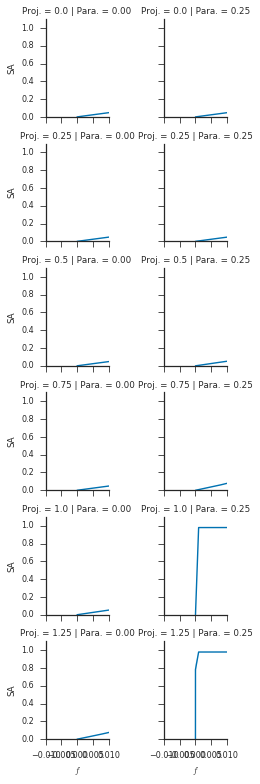

In [3]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.01])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

(0, 1.1)

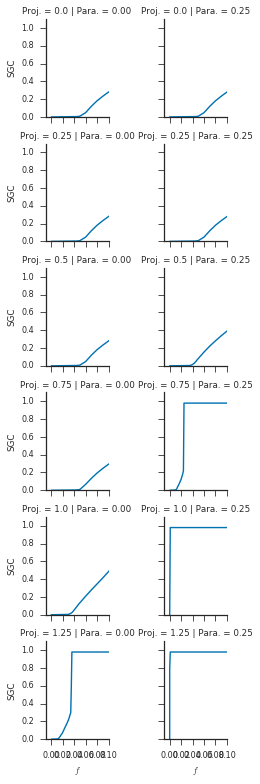

In [4]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SGC')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

[ 0.24940724  0.        ]


/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


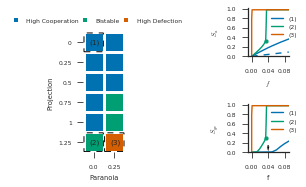

In [54]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(df.Paranoia.unique())
subdf = df.query('(Paranoia==0 & Projection==0) or (Projection==1.25 & Paranoia==0) | (Projection==1.25 & Paranoia>0.2)')
subdf['condition'] = 100 * subdf['Projection'] + np.round(subdf['Paranoia'], 2)
subdf = subdf.sort_values('condition')

# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='condition', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf, time='f', unit='unit', value='SGC', condition='condition',
           color=current_palette, ax=ax,legend=True)
ax.annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[35, 'f'], sgc_mean.loc[35, 125.00], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(0.95, 0.38), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='condition', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='unit', value='SA', condition='condition', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[35, 'f'], sa_mean.loc[35, 125.00], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], loc='upper right', bbox_to_anchor=(.95, 0.89), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.04, 0.08])
ax.plot([0, 0.09], [0, 0.09], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in df.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    #print(projection, paranoia, pepe.query('f<0.01')[['f', 'SA']])
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
    if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
        pv.loc[projection, paranoia] = 'High Defection'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 5.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,:2])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=17)
plt.xlim([0, 2])
plt.ylim([0, 6])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5], [0.0, 0.25])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], [1.25, 1, 0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 5.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.3, 5.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(0.3, 0.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(1.3, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_robust2.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

### More memory

In [78]:
df = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd_more_memory2.pkl')
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df['unit'] = df['seed'] + 0.1 * df['network_seed']
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
network_seed             0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
unit                     0
dtype: int64


Paranoia    0.0  0.214699558768  0.34875477484  0.368992888203  All
Projection                                                         
0.0          50              50             50              50  200
0.25         50              50             50              50  200
0.5          50              50             50              50  200
0.75         50              50             50              50  200
All         200             200            200             200  800

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     0      1.000000  0.000000  Beta(12, 2), Paranoia 0.35  0.348755   
1     1      0.000403  0.999597  Beta(12, 2), Paranoia 0.35  0.348755   
2   101      0.000403  0.999597  Beta(12, 2), Paranoia 0.35  0.348755   
3   201      0.000403  0.999597  Beta(12, 2), Paranoia 0.35  0.348755   
4   301      0.000393  0.999607  Beta(12, 2), Paranoia 0.35  0.348755   

     Prior  Projection  Time  gigant component size  network_seed  seed  \
0  (12, 2)        0.75  1999                      0             4     6   
1  (12, 2)        0.75  1999                  98042             4     6   
2  (12, 2)        0.75  1999                  98042             4     6   
3  (12, 2)        0.75  1999                  98042             4     6   
4  (12, 2)        0.75  1999                  98042             4     6   

   size of active nodes        f      SGC       SA   isna  unit  
0                     0  0.00000  0.00000  0.00000  False   6.4  
1                 98042  0.00001  0.98042  0.98042  False   6.4  
2                 98046  0.00101  0.98042  0.98046  False   6.4  
3                 98046  0.00201  0.98042  0.98046  False   6.4  
4                 98054  0.00301  0.98042  0.98054  False   6.4

0
0.0


(0, 1.1)

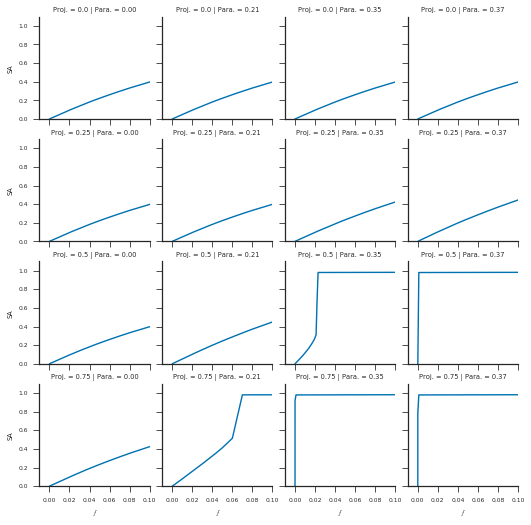

In [57]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

In [58]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

(0, 1.1)

In [79]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(sorted(df.Paranoia.unique()))
subdf = df.query('(Paranoia==0 & Projection==0) or (Projection==0.5 & Paranoia> 0.34 & Paranoia < 0.36) | (Projection==0.75 & Paranoia> 0.34 & Paranoia < 0.36)')
subdf['condition'] = 100 * subdf['Projection'] + np.round(subdf['Paranoia'], 2)
subdf = subdf.sort_values('condition')

# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='condition', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf, time='f', unit='unit', value='SGC', condition='condition',
           color=current_palette, ax=ax,legend=True)
ax.annotate("", xy=(0.05, 0.03), xycoords='data', xytext=(0.05, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[22, 'f'], sgc_mean.loc[22, 50.35], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(0.95, 0.38), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='condition', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='unit', value='SA', condition='condition', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[22, 'f'], sa_mean.loc[22, 50.35], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], loc='upper right', bbox_to_anchor=(.95, 0.89), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.04, 0.08])
ax.plot([0, 0.09], [0, 0.09], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in df.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    #print(projection, paranoia, pepe.query('f<0.01')[['f', 'SA']])
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
    if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
        pv.loc[projection, paranoia] = 'High Defection'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,:4])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=27)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.21, 0.35, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, 1.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(2.38, 1.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(2.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_robust_memory.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

[0.0, 0.21469955876757674, 0.34875477484037409, 0.36899288820276965]


/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
